<a href="https://colab.research.google.com/github/CVerka/Homework/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#initialize variables
breast_Cancer = load_breast_cancer()
nb = GaussianNB()

In [5]:
#checking target size
print(breast_Cancer.target[::100])
print(breast_Cancer.target.shape)
print(breast_Cancer.data.shape)

[0 0 1 0 0 1]
(569,)
(569, 30)


In [6]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(breast_Cancer.data, breast_Cancer.target, random_state=11)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [7]:
#train model
nb.fit(X_train, y_train)
#prediticions
predicted = nb.predict(X=X_test)
expected = y_test
print(f"Predicted:{predicted}\nExpected:{expected}")
#locate incorrect preditcions
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
print(f"Wrong:{wrong}")
print(f'Accurately predicted: {nb.score(X_test, y_test):.2%}')

Predicted:[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0
 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1
 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1]
Expected:[0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0
 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1]
Wrong:[(1, 0), (1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0)]
Accurately predicted: 95.10%


In [8]:
#confusion matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
print(confusion)
#clasification report
names = [str(breast_Cancer)for breast_Cancer in breast_Cancer.target_names]
print(classification_report(expected, predicted, target_names=names))

[[44  6]
 [ 1 92]]
              precision    recall  f1-score   support

   malignant       0.98      0.88      0.93        50
      benign       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



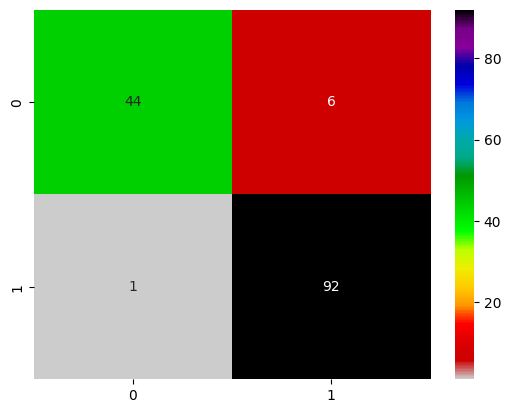

In [9]:
#confustion matrix visuals
confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

In [10]:
#Kfold cross validation
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=nb, X=breast_Cancer.data,
          y=breast_Cancer.target, cv=kfold)
print(f'Scores:{scores}')
print(f'Mean:{scores.mean():.2%}')
print(f'Standard deviation:{scores.std():.2%}')

Scores:[0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
Mean:93.85%
Standard deviation:2.75%


In [11]:
#testing multiple models
estimators = {'GaussianNB': nb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')}
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator = estimator_object, X=breast_Cancer.data, y=breast_Cancer.target, cv=kfold)
    print(f'{estimator_name:>20}: \nMean: {scores.mean():.2%}\nStandard deviation: {scores.std():.2%}\n')

          GaussianNB: 
Mean: 93.85%
Standard deviation: 2.75%

KNeighborsClassifier: 
Mean: 92.79%
Standard deviation: 2.01%

  LogisticRegression: 
Mean: 95.08%
Standard deviation: 3.02%

                 SVC: 
Mean: 91.92%
Standard deviation: 3.52%

